In [8]:
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt
%matplotlib inline

In [9]:
colors = ['maroon', 'forestgreen']
vectorizer = np.vectorize(lambda x: colors[x % len(colors)])

In [10]:
moons,l1 = datasets.make_moons(500,noise=0.05,random_state=42)
swiss_roll,l2 = datasets.make_swiss_roll(500,noise=0.05,random_state=42)

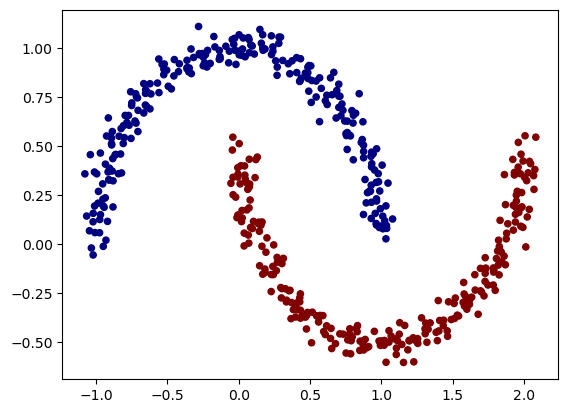

In [11]:
l1 = l1 * 2 - 1
plt.scatter(moons[:,0],moons[:,1],c=l1,s=20,cmap='jet')

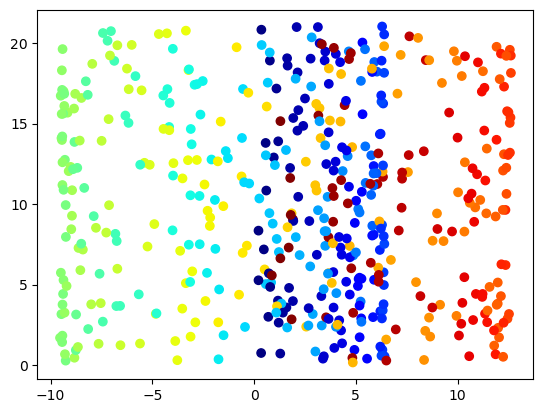

In [12]:
plt.scatter(swiss_roll[:,0],swiss_roll[:,1],c=l2,cmap='jet')

In [13]:
#Ok now to use the MLP we have defined

In [14]:
from micrograd.engine import Value
from micrograd.nn import Module, Neuron, Layer, MLP

In [15]:
model = MLP(2, [16, 16, 1]) # 2-layer neural network
print(model)
print("number of parameters", len(model.parameters()))

number of parameters 337


In [61]:
#Define the loss function
def loss(batch_size=None):
    outs = []
    tl = Value(0)
    if batch_size == None:
        x,y = moons,l1
    
    inputs = [list(map(Value,xrow)) for xrow in x]
    for yrow in y:
        outs.append(Value(yrow))
#     #run a forward pass on the model
    
    score = list(map(model,inputs))
    
    losses = [(Value(1) + -yi*scorei).relu() for yi,scorei in zip(outs,score)]
    for loss in losses:
        tl += loss
        
    data_loss = tl * (1.0 / len(losses))
    # L2 regularization
    # alpha = 1e-4
    # reg_loss = alpha * sum((p*p for p in model.parameters()))
    total_loss = data_loss #+ reg_loss
    
    accuracy = [(yi.data > 0) == (scorei.data > 0) for yi, scorei in zip(outs, score)]
    return total_loss, sum(accuracy) / len(accuracy)


In [62]:
loss()

(Value(1.0101341394846577), 0.5)

In [63]:
for k in range(20):
    
    # forward
    total_loss, acc = loss()
    
    # backward
    model.zero_grad()
    total_loss.backward()
    
    # update (sgd)
    learning_rate = 1.0 - 0.9*k/100
    for p in model.parameters():
        p.data -= learning_rate * p.grad
    
    if k % 1 == 0:
        print(f"step {k} loss {total_loss.data}, accuracy {acc*100}%")

step 0 loss 1.0101341394846577, accuracy 50.0%
step 1 loss 1.004174377826886, accuracy 50.0%
step 2 loss 1.0028114818284741, accuracy 50.0%
step 3 loss 1.0021277705136848, accuracy 50.0%
step 4 loss 1.001708886325566, accuracy 50.0%
step 5 loss 1.0014237926758023, accuracy 50.0%
step 6 loss 1.001216409290135, accuracy 50.0%
step 7 loss 1.00105839005647, accuracy 50.0%
step 8 loss 1.0009337672596674, accuracy 50.0%
step 9 loss 1.000832824986053, accuracy 50.0%
step 10 loss 1.0007492980698602, accuracy 50.0%
step 11 loss 1.0006789587064895, accuracy 50.0%
step 12 loss 1.0006188474964297, accuracy 50.0%
step 13 loss 1.00056682938652, accuracy 50.0%
step 14 loss 1.0005213244799143, accuracy 50.0%
step 15 loss 1.0004811381320733, accuracy 50.0%
step 16 loss 1.0004453499897763, accuracy 50.0%
step 17 loss 1.0004132393721492, accuracy 50.0%
step 18 loss 1.0003842338000002, accuracy 50.0%
step 19 loss 1.0003578726930615, accuracy 50.0%
step 20 loss 1.0003337812563355, accuracy 50.0%
step 21 lo